# Classificazione con il dataset Iris (da CSV)

Notebook per **~4 ore di corso** – livello **junior / molto junior**

Obiettivo: capire *cosa significa classificare*, come funziona un modello semplice e come **valutarlo con grafici**.


## Agenda (4 ore)
1. Cos’è la classificazione e il dataset Iris (30 min)
2. Esplorazione dati visiva (45 min)
3. Prima classificazione: **Logistic Regression** (60 min)
4. Metriche e grafici: accuracy, confusion matrix (45 min)
5. Secondo modello: **KNN** (40 min)
6. Confronto modelli + esercizi (40 min)


## 1) Setup e import

In [65]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["axes.grid"] = True

print("Setup OK")


Setup OK


## 2) Caricamento del dataset Iris
Metti `iris.csv` nella stessa cartella del notebook.
Il target sarà **species** (setosa / versicolor / virginica).

In [66]:

df = pd.read_csv("dataset_aeroporto_screening.csv")
df.head()


,age,flights_last_year,trip_days,one_way_ticket,payment_cash,country_risk_score,baggage_anomaly_score,screening
0,32,5,1,0,0,32,3.6,standard_check
1,30,1,5,1,0,43,0.4,secondary_check
2,21,4,15,0,0,35,0.0,standard_check
3,46,0,4,0,0,47,4.9,secondary_check
4,20,2,11,1,0,37,1.8,secondary_check


### Controllo rapido del dataset

In [67]:

df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1500 non-null   int64  
 1   flights_last_year      1500 non-null   int64  
 2   trip_days              1500 non-null   int64  
 3   one_way_ticket         1500 non-null   int64  
 4   payment_cash           1500 non-null   int64  
 5   country_risk_score     1500 non-null   int64  
 6   baggage_anomaly_score  1500 non-null   float64
 7   screening              1500 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 93.9+ KB


,age,flights_last_year,trip_days,one_way_ticket,payment_cash,country_risk_score,baggage_anomaly_score,screening
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,standard_check
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068
mean,47.624000,3.061333,7.868000,0.175333,0.094000,34.772667,1.943000,NaN
std,17.839585,1.744592,5.293385,0.380379,0.291926,17.220686,1.402736,NaN
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32.000000,2.000000,4.000000,0.000000,0.000000,23.000000,0.800000,NaN
50%,47.500000,3.000000,7.000000,0.000000,0.000000,34.000000,1.900000,NaN
75%,63.000000,4.000000,11.000000,0.000000,0.000000,47.000000,2.900000,NaN


## 3) Esplorazione visiva (EDA)
Guardiamo **come sono distribuite le classi** e se le feature le separano.

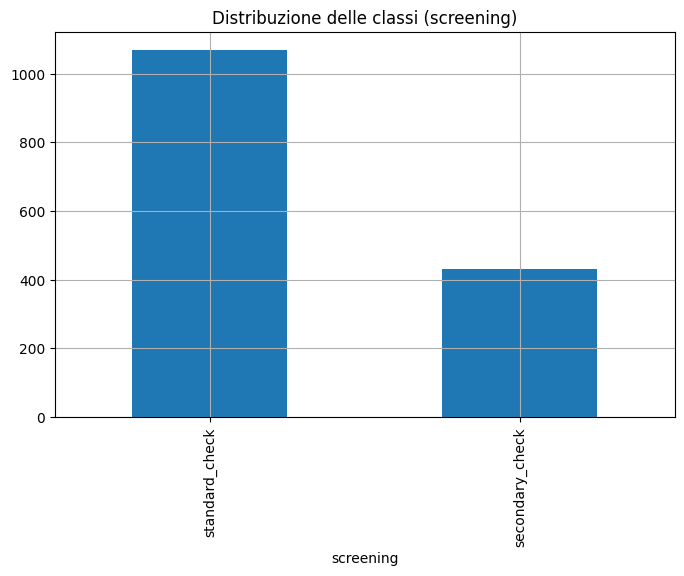

In [68]:

# Distribuzione delle classi
df["screening"].value_counts().plot(kind="bar")
plt.title("Distribuzione delle classi (screening)")
plt.show()


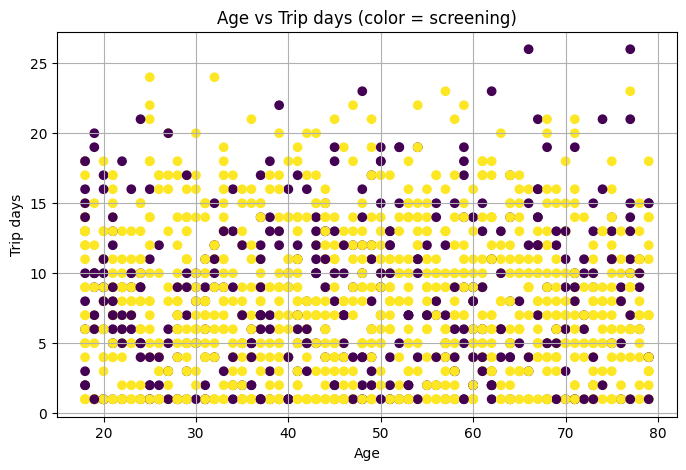

In [ ]:

# Scatter plot molto didattico
plt.scatter(df["age"], df["trip_days"], c=df["screening"].astype("category").cat.codes)
plt.xlabel("age")
plt.ylabel("trip_days")
plt.title("Sepal length vs Petal length (color = screening)")
plt.show()


## 4) Preparazione dei dati
- X = feature numeriche
- y = specie (classe)
- Encoding delle etichette testuali

In [70]:

feature_cols = ["age", "flights_last_year", "trip_days", "flights_last_year"]
X = df[feature_cols]

le = LabelEncoder()
y = le.fit_transform(df["screening"])

le.classes_, np.unique(y)


(array(['secondary_check', 'standard_check'], dtype=object), array([0, 1]))

### Train / Test split

In [71]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((1125, 4), (375, 4))

## 5) Primo modello: Logistic Regression
Nonostante il nome, è un **classificatore**.
Ottimo come primo modello perché:
- semplice
- veloce
- spesso sorprendentemente efficace

In [72]:

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


### Valutazione: Accuracy

In [73]:

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {acc:.3f}")


Accuracy = 0.712


### Confusion Matrix (fondamentale per i junior)

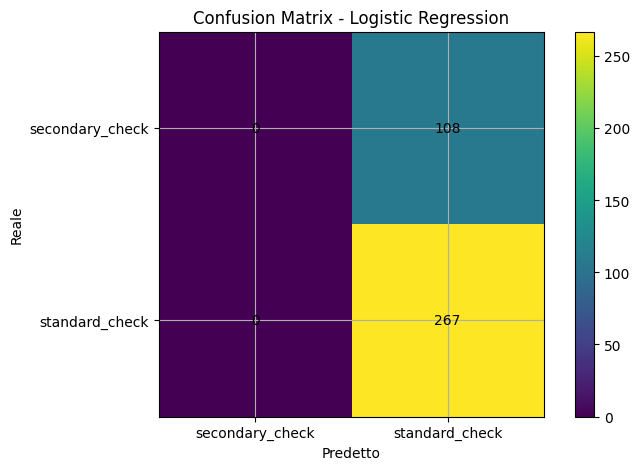

In [74]:

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.colorbar()
plt.xticks(range(2), le.classes_)
plt.yticks(range(2), le.classes_)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Confusion Matrix - Logistic Regression")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


### Classification report
Precision, recall e f1-score (solo lettura, niente matematica pesante).

In [75]:

print(classification_report(y_test, y_pred, target_names=le.classes_))


                 precision    recall  f1-score   support

secondary_check       0.00      0.00      0.00       108
 standard_check       0.71      1.00      0.83       267

       accuracy                           0.71       375
      macro avg       0.36      0.50      0.42       375
   weighted avg       0.51      0.71      0.59       375



/home/marco/projects/PythonEx/src/Modulo 3/venv_modulo3/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/marco/projects/PythonEx/src/Modulo 3/venv_modulo3/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/marco/projects/PythonEx/src/Modulo 3/venv_modulo3/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co

## 6) Secondo modello: K-Nearest Neighbors (KNN)
Idea intuitiva:
> Dimmi chi sono i tuoi vicini e ti dirò chi sei.

In [76]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy KNN = {acc_knn:.3f}")


Accuracy KNN = 0.659


### Confusion Matrix – KNN

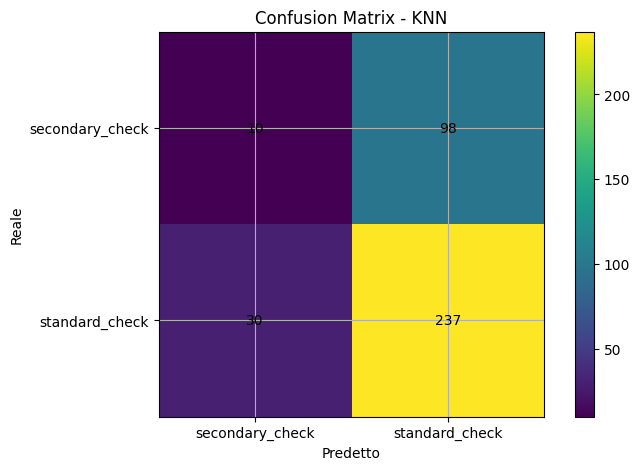

In [77]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.imshow(cm_knn)
plt.colorbar()
plt.xticks(range(2), le.classes_)
plt.yticks(range(2), le.classes_)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Confusion Matrix - KNN")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_knn[i, j], ha="center", va="center")

plt.show()


## 7) Confronto modelli

In [78]:

pd.DataFrame({
    "Modello": ["Logistic Regression", "KNN (k=5)"],
    "Accuracy": [acc, acc_knn]
})


,Modello,Accuracy
0,Logistic Regression,0.712000
1,KNN (k=5),0.658667


## 8) Mini-esercizi (30–40 min)
1. Cambia `n_neighbors` (3, 7, 9) e osserva l’accuracy
2. Usa solo 2 feature invece di 4
3. Cambia lo split train/test (30%)

Domanda chiave:
**Meglio un modello più semplice o più complesso?**

## 9) Messaggi chiave da portare a casa
- Classificazione ≠ regressione
- Accuracy da sola non basta
- Confusion matrix = strumento fondamentale
- Non esiste il modello perfetto, esiste il modello *adatto*

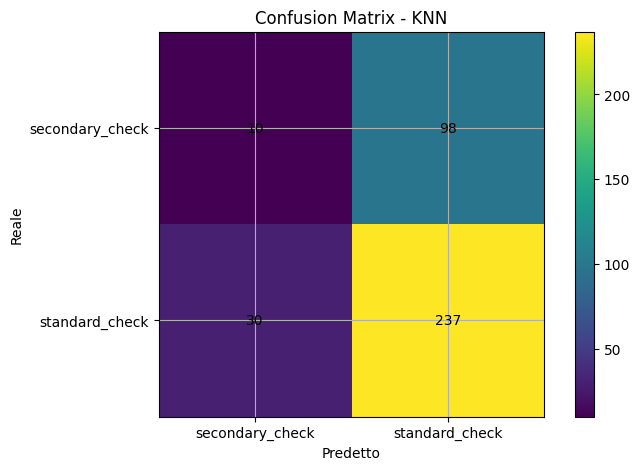

In [81]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.imshow(cm_knn)
plt.colorbar()
plt.xticks(range(2), le.classes_)
plt.yticks(range(2), le.classes_)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Confusion Matrix - KNN")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_knn[i, j], ha="center", va="center")

plt.show()


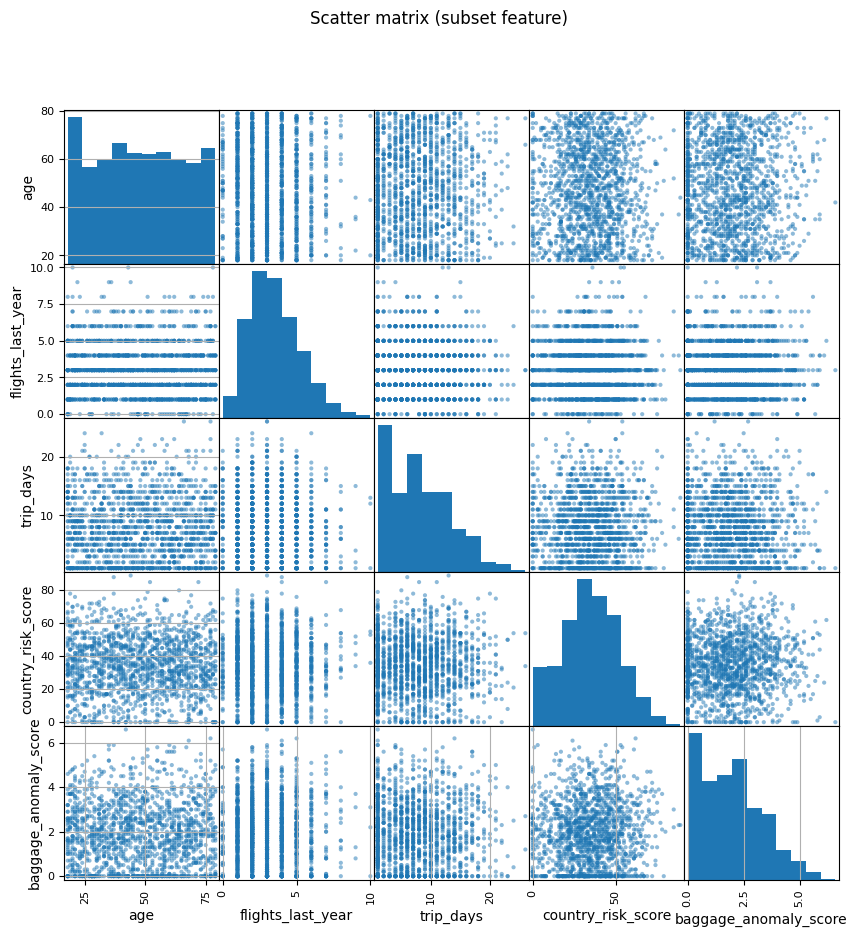

In [83]:
# Scatter matrix (matrice di dispersione)
# Nota: con tante colonne il grafico diventa grande; scegliamo un subset sensato.
from pandas.plotting import scatter_matrix

cols_for_scatter = [
    "age",
    "flights_last_year",
    "trip_days",
    "country_risk_score",
    "baggage_anomaly_score",
]

scatter_matrix(df[cols_for_scatter], figsize=(10, 10))
plt.suptitle("Scatter matrix (subset feature)")
plt.show()